In [1]:
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import os
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [3]:
print("Image Data Shape:", load_digits().images.shape)
print("Image Data Shape:", load_digits().data.shape)
print("Label Data Shape:", load_digits().target.shape)

Image Data Shape: (1797, 8, 8)
Image Data Shape: (1797, 64)
Label Data Shape: (1797,)


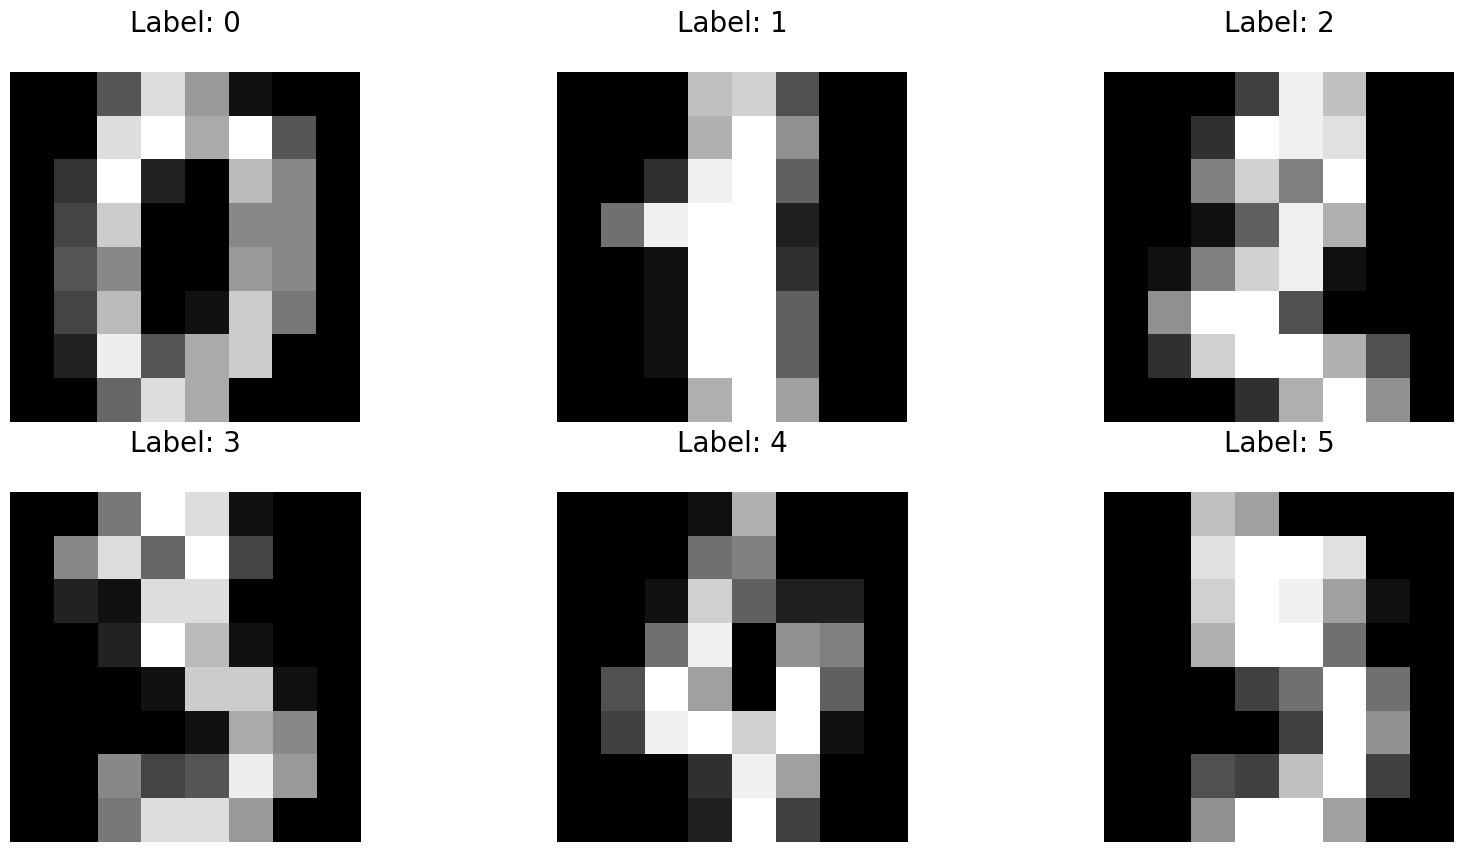

In [4]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(load_digits().images[i], cmap='gray')
    plt.title('Label: %i\n' % load_digits().target[i], fontsize = 20)
    plt.axis('off')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(load_digits().data, load_digits().target, test_size=0.8, random_state=42)

In [6]:
print(X_train.shape)

(359, 64)


In [7]:
print(X_test.shape)

(1438, 64)


In [8]:
print(y_train.shape)

(359,)


In [9]:
print(y_test.shape)

(1438,)


In [10]:
log_reg = LogisticRegression(solver='liblinear', multi_class='ovr')

In [11]:
log_reg.fit(X_train, y_train)

c:\Users\meher\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\meher\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'ovr'


In [12]:
print(log_reg.predict(X_test))

[6 9 3 ... 7 3 2]


In [13]:
print(log_reg.predict(X_test[0].reshape(1, -1)))

[6]


In [14]:
print("Logistic Regression for first 10 test samples:\n", log_reg.predict(X_test[:10]))

Logistic Regression for first 10 test samples:
 [6 9 3 7 2 2 5 2 5 2]


In [15]:
pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, pred))

Logistic Regression Accuracy: 0.9339360222531293


In [16]:
score = log_reg.score(X_test, y_test)
print("Logistic Regression Score:", score)

Logistic Regression Score: 0.9339360222531293


[[131   0   0   0   0   3   0   0   0   0]
 [  0 130   2   1   2   0   1   0   8   0]
 [  1   0 134   0   0   0   0   0   9   0]
 [  1   0   2 130   0   0   0   2  11   1]
 [  0   1   0   0 136   0   0   1   1   1]
 [  0   1   0   1   0 143   2   0   0   2]
 [  1   1   0   0   1   0 146   0   1   0]
 [  0   0   0   0   2   1   0 144   0   2]
 [  0   8   0   2   1   5   1   1 116   1]
 [  0   2   0   1   0   1   0   5   4 133]]


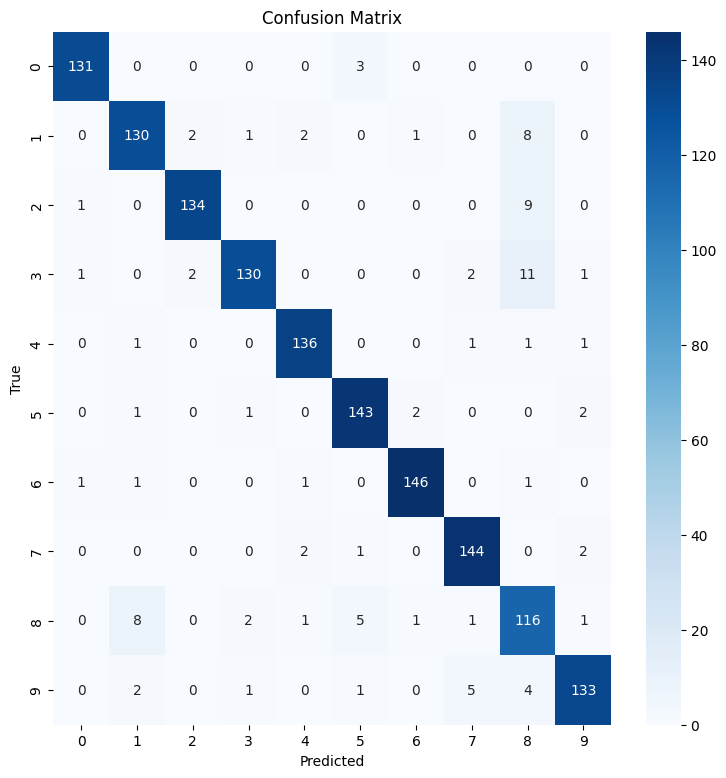

In [17]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

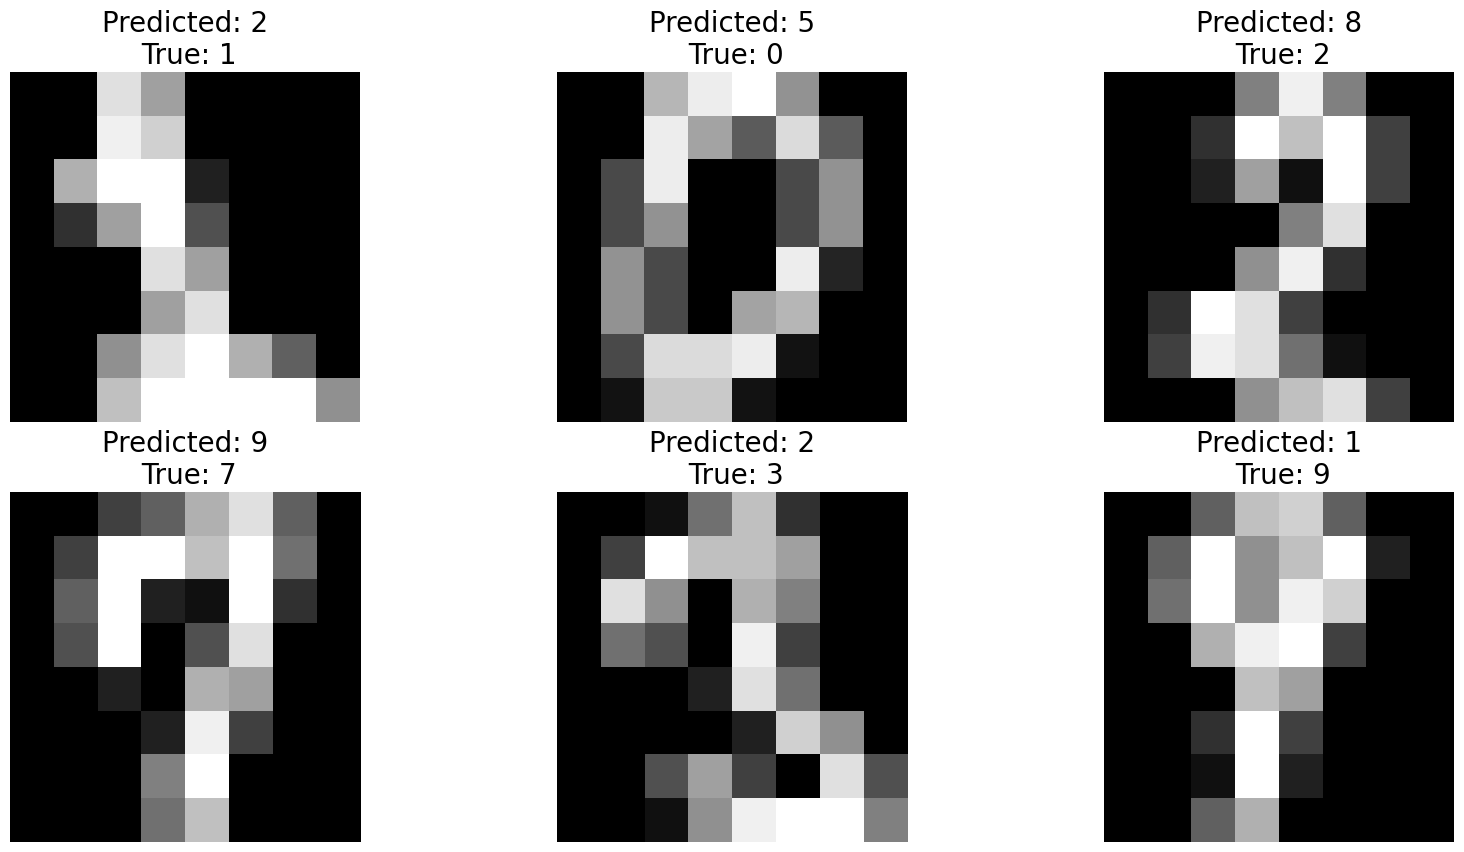

In [18]:
index = 0
missclassifiedIndex = []
for predict, actual in zip(pred, y_test):
    if predict != actual:
        missclassifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[missclassifiedIndex[i]].reshape(8,8), cmap='gray')
    plt.title('Predicted: %i\n True: %i' % (pred[missclassifiedIndex[i]], y_test[missclassifiedIndex[i]]), fontsize = 20)
    plt.axis('off')
plt.show()

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(359, 64)
(1438, 64)
(359,)
(1438,)
